In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Pre processing

In [82]:
df =pd.read_excel('voice.csv')
df.head(5)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.shape

(3168, 21)

In [6]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [8]:
new_df = df['label'].value_counts().rename_axis('Category').reset_index(name = 'Count')
new_df

,Category,Count
0,male,1584
1,female,1584


In [9]:
chart_labels = new_df.Category
chart_values = new_df.Count

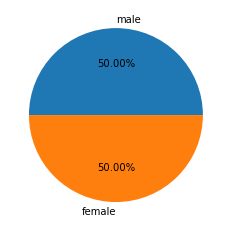

In [14]:
plt.pie(chart_values,labels = chart_labels, autopct = '%1.2f%%')
plt.show()

In [17]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [18]:
cat_cols = [i for i in df.columns if df[i].dtypes=='object']
cat_cols

['label']

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
lb = LabelEncoder()
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [21]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int32
dtype: object

In [25]:
x = df.drop(['label'], axis = 1)
y = df.label.values

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
Algo_names = []
Algo_Accuracy = []

# 1)Decision Tree

In [28]:
d_Tree = DecisionTreeClassifier(random_state = 42)
d_Tree.fit(x_train, y_train)
print("Accuracy of Decision Tree Classifier is: ", (d_Tree.score(x_test, y_test))*100)
Algo_names.append("Decision Tree Classifier")
Algo_Accuracy.append((d_Tree.score(x_test, y_test))*100)
pred1 = d_Tree.predict(x_test)

Accuracy of Decision Tree Classifier is:  96.68769716088327


# Confusion matrix and classification report for Model decision tree

In [80]:
def confusion(m,ytest,ypred):
    m = confusion_matrix(ytest,ypred)
    print(m)
    sns.heatmap(m, annot = True, fmt = ".0f")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.title("Confusion matrix for Decision Tree Classifier")
    plt.show()
    report_r_Forest= classification_report(ytest, ypred)
    print(report_r_Forest)

[[292   5]
 [ 16 321]]


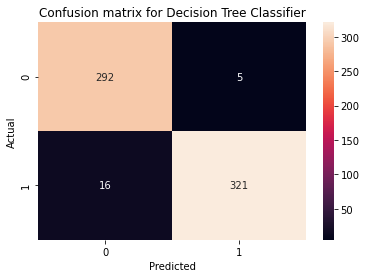

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.98      0.95      0.97       337

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [81]:
confusion(d_Tree,y_test,pred1)

# 2)Random Forest

In [33]:
r_Forest = RandomForestClassifier()
r_Forest.fit(x_train, y_train)
print("Accuracy of Random Forest Classifer is: ", (r_Forest.score(x_test, y_test))*100)
Algo_names.append("Random Forest Classifer")
Algo_Accuracy.append((r_Forest.score(x_test, y_test))*100)
pred2 = r_Forest.predict(x_test)

Accuracy of Random Forest Classifer is:  98.26498422712933


# Confusion matrix and classification report for Random Forest Classifier Model

[[295   2]
 [  9 328]]


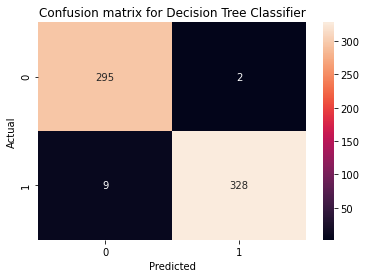

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       297
           1       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [52]:
confusion(r_Forest,y_test,pred2)

# 3)KNN CLASSIFER

In [61]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train, y_train)
print("Accuracy of KNN Classifer is: ", (KNN.score(x_test, y_test))*100)
Algo_names.append("KNN Classifer")
Algo_Accuracy.append((KNN.score(x_test, y_test))*100)
pred3 = KNN.predict(x_test)

Accuracy of KNN Classifer is:  70.50473186119874


# Confusion matrix and classification report for KNN Model

[[208  89]
 [ 98 239]]


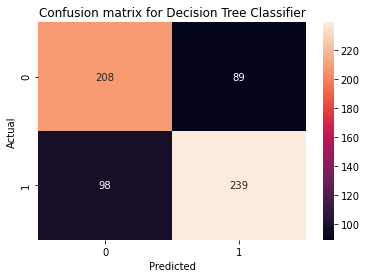

              precision    recall  f1-score   support

           0       0.68      0.70      0.69       297
           1       0.73      0.71      0.72       337

    accuracy                           0.71       634
   macro avg       0.70      0.70      0.70       634
weighted avg       0.71      0.71      0.71       634



In [62]:
confusion(KNN,y_test,pred3)

# 4)LOGISTIC REGRESSION

In [63]:
LR = LogisticRegression(random_state = 42, max_iter = 1000)
LR.fit(x_train, y_train)
print("Accuracy of Logistic Regression is: ", (LR.score(x_test, y_test))*100)
Algo_names.append("Logistic Regression")
Algo_Accuracy.append((LR.score(x_test, y_test))*100)
pred4 = LR.predict(x_test)

Accuracy of Logistic Regression is:  92.58675078864354


# Confusion matrix and classification report for Logistic regression Model

[[261  36]
 [ 11 326]]


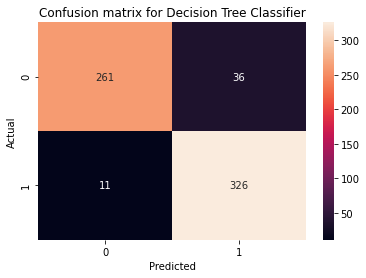

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       297
           1       0.90      0.97      0.93       337

    accuracy                           0.93       634
   macro avg       0.93      0.92      0.93       634
weighted avg       0.93      0.93      0.93       634



In [64]:
confusion(LR,y_test,pred4)

# 5) SVM CLASSIFER

In [67]:
svm = SVC()
svm.fit(x_train, y_train)
print("Accuracy of SVM Classifer is: ", (svm.score(x_test, y_test))*100)
Algo_names.append("SVM classifer")
Algo_Accuracy.append((svm.score(x_test, y_test))*100)
pred5 = svm.predict(x_test)

Accuracy of SVM Classifer is:  65.61514195583597


# Confusion matrix and classification report forSVM Model

[[171 126]
 [ 92 245]]


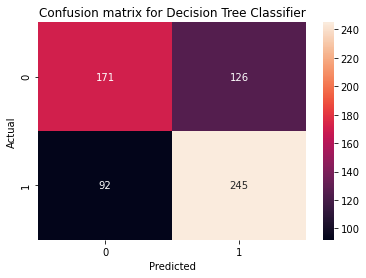

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       297
           1       0.66      0.73      0.69       337

    accuracy                           0.66       634
   macro avg       0.66      0.65      0.65       634
weighted avg       0.66      0.66      0.65       634



In [68]:
confusion(svm,y_test,pred5)

# Comparisions of accuracy(scores) of all the classifier models

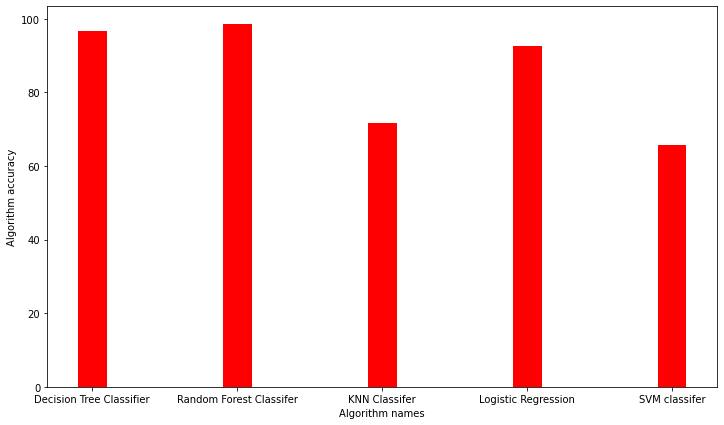

In [79]:
plt.figure(figsize = (12,7))
plt.bar(Algo_names, Algo_Accuracy, width = 0.2, color = ['red'])
plt.xlabel("Algorithm names")
plt.ylabel("Algorithm accuracy")
plt.show() 

# CONCLUSION
From the above Bar Chart, which shows the accuracy of various classifier models, It is pretty evidient that Random Forest Classifier performs best with an accuracy of 98% for the given dataset in comparision to other classifier models.